In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from prettytable import PrettyTable
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('drive/My Drive/Major Project/S1Data.csv')
data.head()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [6]:
data.shape

(299, 13)

In [7]:
data.isnull().sum()

TIME                 0
Event                0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Pletelets            0
CPK                  0
dtype: int64

In [8]:
print("Minimum value of each feature\n", data.min(), "\nMaximum value of each feature\n", data.max())

Minimum value of each feature
 TIME                     4.0
Event                    0.0
Gender                   0.0
Smoking                  0.0
Diabetes                 0.0
BP                       0.0
Anaemia                  0.0
Age                     40.0
Ejection.Fraction       14.0
Sodium                 113.0
Creatinine               0.5
Pletelets            25100.0
CPK                     23.0
dtype: float64 
Maximum value of each feature
 TIME                    285.0
Event                     1.0
Gender                    1.0
Smoking                   1.0
Diabetes                  1.0
BP                        1.0
Anaemia                   1.0
Age                      95.0
Ejection.Fraction        80.0
Sodium                  148.0
Creatinine                9.4
Pletelets            850000.0
CPK                    7861.0
dtype: float64


In [10]:
from sklearn import preprocessing
X=data.drop(['Event'],axis=1)
y=data['Event']
x = preprocessing.normalize(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#Implementing Algorithms

In [11]:
# Sklearn metrics
from sklearn.metrics import mean_squared_error
# Sklearn models

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


table = PrettyTable()
normalization_table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "Test Score", "Train Score"]
normalization_table.field_names = ["Model", "Mean Squared Error", "Test Score", "Train Score"]

models = [
    RandomForestClassifier(n_estimators=17,max_depth=3),
    SVC(kernel='linear') ,
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_test)
    mse_n = mean_squared_error(y_test, y_res)
    test_score_n = model.score(x_test, y_test)    
    train_score_n = model.score(x_train, y_train)
    normalization_table.add_row([type(model).__name__, format(mse_n, '.2f'), format(test_score_n, '.2f'), format(train_score_n, '.2f')])
    
    
    model.fit(X_train, Y_train) 
    Y_res = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_res)
    test_score = model.score(X_test, Y_test)    
    train_score = model.score(X_train, Y_train)
    table.add_row([type(model).__name__, format(mse, '.2f'), format(test_score, '.2f'), format(train_score, '.2f')])


print("Accuracy values before normalization\n", table, "\nAccuracy values after normalization\n", normalization_table)

Accuracy values before normalization
 +------------------------+--------------------+------------+-------------+
|         Model          | Mean Squared Error | Test Score | Train Score |
+------------------------+--------------------+------------+-------------+
| RandomForestClassifier |        0.17        |    0.83    |     0.90    |
|          SVC           |        0.20        |    0.80    |     0.79    |
|   LogisticRegression   |        0.12        |    0.88    |     0.82    |
| DecisionTreeClassifier |        0.22        |    0.78    |     1.00    |
|  KNeighborsClassifier  |        0.43        |    0.57    |     0.74    |
+------------------------+--------------------+------------+-------------+ 
Accuracy values after normalization
 +------------------------+--------------------+------------+-------------+
|         Model          | Mean Squared Error | Test Score | Train Score |
+------------------------+--------------------+------------+-------------+
| RandomForestClassifier

#Feature Scaling

HeatMap

Event                1.000000
Creatinine           0.294278
Age                  0.253729
BP                   0.079351
Anaemia              0.066270
CPK                  0.062728
Diabetes            -0.001943
Gender              -0.004316
Smoking             -0.012623
Pletelets           -0.049139
Sodium              -0.195204
Ejection.Fraction   -0.268603
TIME                -0.526964
Name: Event, dtype: float64

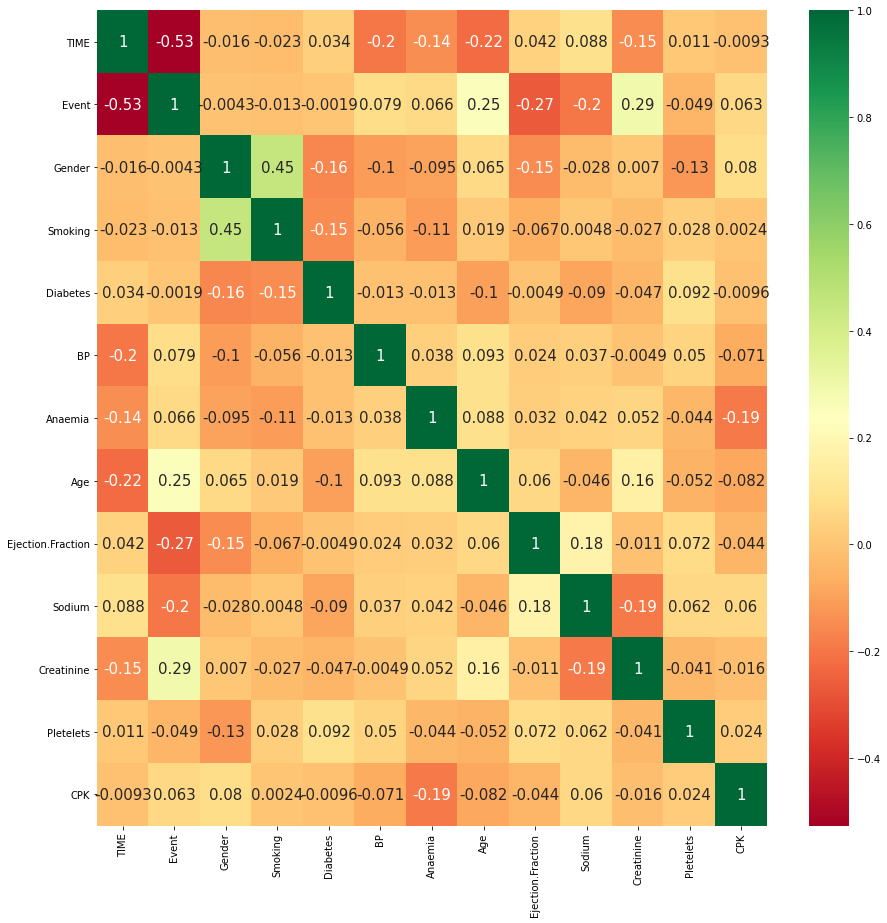

In [12]:
corr_matrix = data.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(15, 15))
sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
data.corr()['Event'].sort_values(ascending=False)

Pearson correlation coefficients

In [13]:
import operator
from scipy.stats import pearsonr
d = {}
for i in data:
  corr, _ = pearsonr(data[i], data["Event"])
  d[i] = abs(corr)
sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i, sorted_d[i])

Event 0.9999999999999999
TIME 0.5269637792775768
Creatinine 0.29427756098414926
Ejection.Fraction 0.26860331239406204
Age 0.25372854308800363
Sodium 0.1952035964164012
BP 0.07935105769128536
Anaemia 0.06627009846028778
CPK 0.06272816025237477
Pletelets 0.04913886798037428
Smoking 0.012623152709359632
Gender 0.004316376319703108
Diabetes 0.001942883344203477


Chi squared test

In [14]:
import operator
from scipy.stats import chi2_contingency
di = {}
for i in data:
  d = pd.crosstab(data[i], data['Event'])
  stat, p, dof, expected = chi2_contingency(d)
  #print(i, str(p))
  di[i] = p
sorted_d = dict( sorted(di.items(), key=operator.itemgetter(1)))
for i in sorted_d:
  print(i, sorted_d[i])

Event 5.386429328048915e-66
Ejection.Fraction 6.459327810543188e-08
TIME 6.590460363385011e-07
Creatinine 3.1452364264229703e-06
Sodium 0.009600557349298953
Age 0.015227406432460549
BP 0.21410341199416902
Anaemia 0.3073160508415107
CPK 0.43175059718299313
Pletelets 0.5482703513757745
Diabetes 0.9267235137291102
Smoking 0.9317652998235507
Gender 0.9560508538247334


#Implementing algorithms after feature scaling

In [16]:
X=data.drop(['CPK', 'Pletelets', 'Diabetes', 'Smoking', 'Gender', 'Event'],axis=1)
y=data['Event']
x = preprocessing.normalize(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
table = PrettyTable()
normalization_table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "Test Score", "Train Score"]
normalization_table.field_names = ["Model", "Mean Squared Error", "Test Score", "Train Score"]

models = [
    RandomForestClassifier(n_estimators=17,max_depth=3),
    SVC(kernel='linear') ,
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_test)
    mse_n = mean_squared_error(y_test, y_res)
    test_score_n = model.score(x_test, y_test)    
    train_score_n = model.score(x_train, y_train)
    normalization_table.add_row([type(model).__name__, format(mse_n, '.2f'), format(test_score_n, '.2f'), format(train_score_n, '.2f')])
    
    
    model.fit(X_train, Y_train) 
    Y_res = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_res)
    test_score = model.score(X_test, Y_test)    
    train_score = model.score(X_train, Y_train)
    table.add_row([type(model).__name__, format(mse, '.2f'), format(test_score, '.2f'), format(train_score, '.2f')])


print("Accuracy values before normalization\n", table, "\nAccuracy values after normalization\n", normalization_table)

Accuracy values before normalization
 +------------------------+--------------------+------------+-------------+
|         Model          | Mean Squared Error | Test Score | Train Score |
+------------------------+--------------------+------------+-------------+
| RandomForestClassifier |        0.16        |    0.84    |     0.89    |
|          SVC           |        0.18        |    0.82    |     0.84    |
|   LogisticRegression   |        0.18        |    0.82    |     0.84    |
| DecisionTreeClassifier |        0.18        |    0.82    |     1.00    |
|  KNeighborsClassifier  |        0.11        |    0.89    |     0.86    |
+------------------------+--------------------+------------+-------------+ 
Accuracy values after normalization
 +------------------------+--------------------+------------+-------------+
|         Model          | Mean Squared Error | Test Score | Train Score |
+------------------------+--------------------+------------+-------------+
| RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Implementing algorithms by using only serum creatinine and ejection

In [20]:
X=data[['Creatinine', 'Ejection.Fraction']]
x = preprocessing.normalize(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
table = PrettyTable()
normalization_table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "Test Score", "Train Score"]
normalization_table.field_names = ["Model", "Mean Squared Error", "Test Score", "Train Score"]

models = [
    RandomForestClassifier(n_estimators=17,max_depth=3),
    SVC(kernel='linear') ,
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_test)
    mse_n = mean_squared_error(y_test, y_res)
    test_score_n = model.score(x_test, y_test)    
    train_score_n = model.score(x_train, y_train)
    normalization_table.add_row([type(model).__name__, format(mse_n, '.2f'), format(test_score_n, '.2f'), format(train_score_n, '.2f')])
    
    
    model.fit(X_train, Y_train) 
    Y_res = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_res)
    test_score = model.score(X_test, Y_test)    
    train_score = model.score(X_train, Y_train)
    table.add_row([type(model).__name__, format(mse, '.2f'), format(test_score, '.2f'), format(train_score, '.2f')])


print("Accuracy values before normalization\n", table, "\nAccuracy values after normalization\n", normalization_table)

Accuracy values before normalization
 +------------------------+--------------------+------------+-------------+
|         Model          | Mean Squared Error | Test Score | Train Score |
+------------------------+--------------------+------------+-------------+
| RandomForestClassifier |        0.24        |    0.76    |     0.80    |
|          SVC           |        0.31        |    0.69    |     0.71    |
|   LogisticRegression   |        0.30        |    0.70    |     0.77    |
| DecisionTreeClassifier |        0.32        |    0.68    |     0.91    |
|  KNeighborsClassifier  |        0.21        |    0.79    |     0.82    |
+------------------------+--------------------+------------+-------------+ 
Accuracy values after normalization
 +------------------------+--------------------+------------+-------------+
|         Model          | Mean Squared Error | Test Score | Train Score |
+------------------------+--------------------+------------+-------------+
| RandomForestClassifier